In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datos_completo = pd.read_csv('events.csv')

/home/soledad-escobar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
datos_completo.shape

(1011288, 23)

In [3]:
datos_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [4]:
eventos = datos_completo['event']
eventos.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

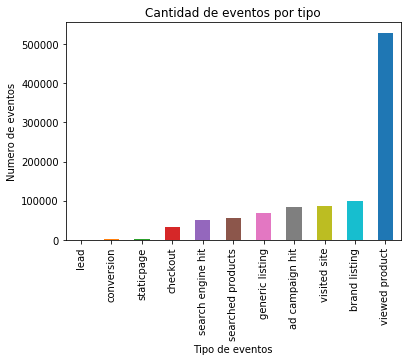

In [5]:
grupo_eventos=datos_completo.groupby(['event'])['event'].count().sort_values()
d=grupo_eventos.plot(kind='bar', title="Cantidad de eventos por tipo")
d.set_ylabel("Numero de eventos")
d.set_xlabel("Tipo de eventos")
d

In [6]:
#veamos de donde provienen los usuarios del sitio
df_con_region = datos_completo.loc[pd.notnull(datos_completo['region'])] #saco los que no tienen region
df_personas_con_region = df_con_region.drop_duplicates(subset='person') #saco todos los duplicados de cada usuario
paises_por_cada_usuario = df_personas_con_region['country']
paises_por_cada_usuario.value_counts().head()

Brazil           25768
Unknown            716
United States      297
Argentina           24
Canada              10
Name: country, dtype: int64

In [7]:
#analizamos las ciudades de Brasil donde estan la gran mayoria de los usuarios
df_usuarios_brasil = df_personas_con_region.loc[df_personas_con_region['country'] == 'Brazil']
ciudades_usuarios_brasil = df_usuarios_brasil['city']
cantidad_de_usuarios_brasil_por_ciudad = ciudades_usuarios_brasil.value_counts()[1:11] #Saco a Unknown
cantidad_de_usuarios_brasil_por_ciudad

São Paulo         3532
Rio de Janeiro    1153
Belo Horizonte     748
Salvador           746
Brasília           452
Fortaleza          375
Curitiba           370
Recife             307
Osasco             282
Porto Alegre       281
Name: city, dtype: int64

Text(0,0.5,'Cantidad de usuarios')

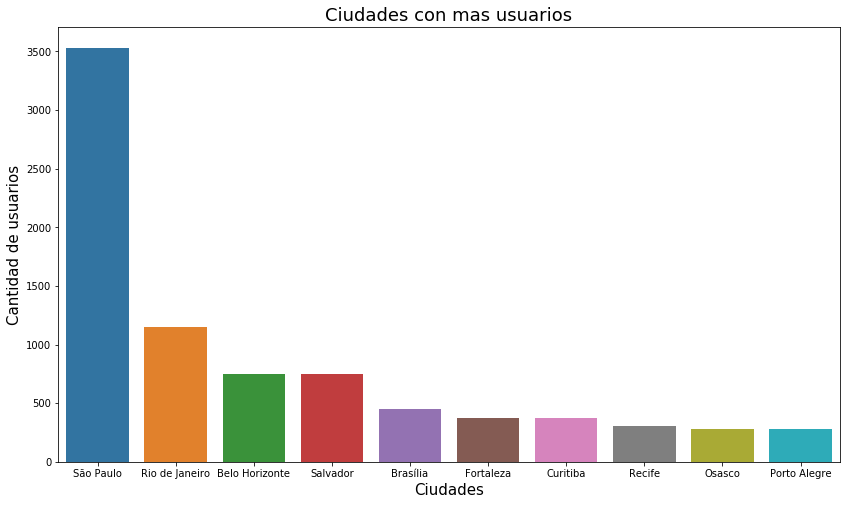

In [8]:
plt.subplots(figsize=(14,8))
bp = sns.barplot(x=cantidad_de_usuarios_brasil_por_ciudad.index, y= cantidad_de_usuarios_brasil_por_ciudad.values)
bp.set_title("Ciudades con mas usuarios", fontsize=18)
bp.set_xlabel("Ciudades", fontsize=15)
bp.set_ylabel("Cantidad de usuarios", fontsize=15)

In [10]:
#personas que realizaron checkouts y conversiones 
events = datos_completo.groupby('event')
vieweds = pd.DataFrame(events.get_group('viewed product'))
checkouts =pd.DataFrame(events.get_group('checkout'))
conversiones = pd.DataFrame(events.get_group('conversion'))
viewed_checkout = pd.merge(checkouts, vieweds, on = 'person', how = 'inner')
checkout_conversion = pd.merge(conversiones, checkouts, on = 'person', how = 'inner')
checkout_conversion.head()

,timestamp_x,event_x,person,url_x,sku_x,model_x,condition_x,storage_x,color_x,skus_x,...,search_engine_y,channel_y,new_vs_returning_y,city_y,region_y,country_y,device_type_y,screen_resolution_y,operating_system_version_y,browser_version_y
0,2018-03-20 17:46:12,conversion,00204059,NaN,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-20 17:46:12,conversion,00204059,NaN,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-20 17:46:12,conversion,00204059,NaN,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-03-20 17:46:12,conversion,00204059,NaN,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-03-20 17:46:12,conversion,00204059,NaN,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Identifico los ids de los modelos buscados
#PD: ES HORRIBLE, SI A ALGUIEN SE LE OCURRE COMO HACERLO MEJOR SIENTASE LIBRE DE MEJORARLO
searched =pd.DataFrame(events.get_group('searched products'))
searched_skus = searched['skus'].value_counts()
skus_list = []
for skus in searched_skus.index:
    for sku in str(skus).split(','):
        skus_list.append(sku)
id_modelos_buscados = pd.DataFrame(skus_list)
id_modelos_buscados.columns = ['sku']


In [12]:
modelos_existentes = pd.DataFrame(datos_completo.filter(items = ['sku', 'model']))
modelos_existentes.head()
buscados_vs_existentes = pd.merge(id_modelos_buscados, modelos_existentes, on = 'sku', how = 'left')
buscados_vs_existentes['model'].value_counts().head()

iPhone 6             30165
iPhone 5s            18197
iPhone SE             9452
iPhone 6S             9088
Samsung Galaxy S7     8812
Name: model, dtype: int64

In [13]:
# Comparo si hay modelos disponibles que no sean hayan sido buscados
buscados_vs_existentes = pd.merge(id_modelos_buscados, modelos_existentes, on = 'sku', how = 'right')
buscados_vs_existentes.head()

,sku,model
0,8485,Samsung Galaxy S7
1,8485,Samsung Galaxy S7
2,8485,Samsung Galaxy S7
3,8485,Samsung Galaxy S7
4,8485,Samsung Galaxy S7


Text(0,0.5,'Cantidad de conversiones')

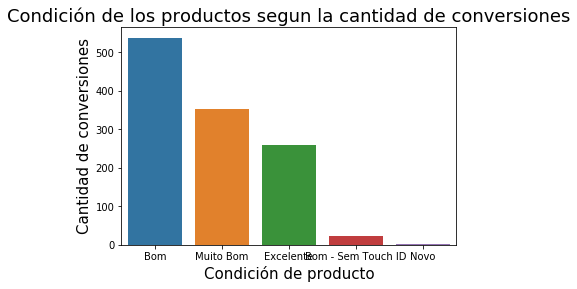

In [14]:
#Quiero ver en que condicion estan los productos dentro de las conversiones
condiciones = conversiones['condition'].value_counts()
graph = sns.barplot(x=condiciones.index, y= condiciones.values)
graph.set_title("Condición de los productos segun la cantidad de conversiones", fontsize=18)
graph.set_xlabel("Condición de producto", fontsize=15)
graph.set_ylabel("Cantidad de conversiones", fontsize=15)

In [20]:
conteoDePersonas = datos_completo.groupby(['timestamp', 'event']).count()

In [28]:
contEvents = conteoDePersonas.pivot_table(index = 'timestamp', columns = 'event', values = 'person')
contEvents.groupby('timestamp').head()
persEvent = contEvents.fillna(0)
new1 = persEvent.reset_index()
new1['timestamp'] = pd.to_datetime(new1['timestamp'], format='%Y%m%d %H:%M:%S.%f')
new1['mes'] = new1['timestamp'].dt.month
new1['dia'] = new1['timestamp'].dt.day
# Calculo el promedio de personas que asisten a eventos 
new1['pers_en_event'] = new1.filter(items = ['ad campaign hit', 'brand listing','checkout', 'conversion', 'generic listing','lead', 'search engine hit', 'searched products', 'staticpage', 'viewed product', 'visited site']).sum(axis = 1)



dia,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
mes,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.004950,0.004237,0.000000,0.006192,0.007916,0.004695,0.008772,...,0.004161,0.005457,0.003231,0.002584,0.000000,0.001600,0.000000,0.001733,0.003072,0.012442
2,0.012862,0.004673,0.007260,0.000000,0.006211,0.000000,0.000000,0.005415,0.010399,0.004959,...,0.005988,0.001446,0.005362,0.002899,0.003263,0.004196,0.001426,NaN,NaN,NaN
3,0.003475,0.003785,0.001654,0.005365,0.004127,0.006806,0.002208,0.001702,0.000678,0.008588,...,0.004408,0.004779,0.001837,0.003337,0.005793,0.004022,0.003035,0.002040,0.005188,0.003492
4,0.001835,0.002892,0.005178,0.004289,0.002883,0.001470,0.001516,0.003844,0.003665,0.001529,...,0.002334,0.003119,0.002047,0.002115,0.002762,0.003003,0.001694,0.004225,0.003031,NaN
5,0.002457,0.001424,0.002080,0.001862,0.001118,0.001069,0.002076,0.001697,0.004235,0.003296,...,0.000490,0.000206,0.000299,0.000231,0.000272,0.000098,0.000350,0.000586,0.000747,0.000446


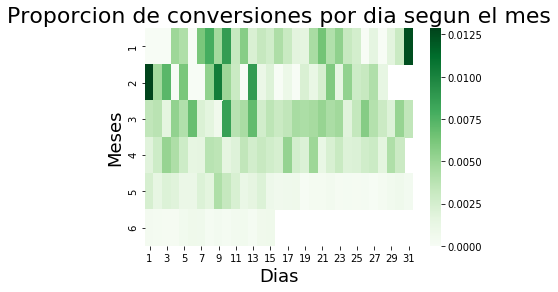

In [29]:
for_heatmap = new1.pivot_table(index = 'mes', columns = 'dia', values = 'conversion')
g = sns.heatmap(for_heatmap,  cmap="Greens")
g.set_title("Proporcion de conversiones por dia segun el mes", fontsize=22)
g.set_xlabel("Dias",fontsize=18)
g.set_ylabel("Meses", fontsize=18)
for_heatmap.head()

In [30]:
datos_completo.groupby('event').get_group('visited site')['screen_resolution'].value_counts().head()

360x640      30009
1366x768     21379
320x534       3622
1920x1080     3521
320x570       2561
Name: screen_resolution, dtype: int64

In [31]:
#Agrego los dias 
new1['dia'] = new1['timestamp'].dt.day

mes,1,2,3,4,5,6
dia,,,,,,
1,1.450000,1.194534,1.191138,1.201223,1.199962,1.324900
2,1.182979,1.174455,1.175625,1.194087,1.219022,1.304108
3,1.149367,1.203267,1.177833,1.166667,1.222816,1.303189
4,1.178218,1.201709,1.231760,1.181584,1.214308,1.355860
5,1.114407,1.192547,1.216644,1.175360,1.197156,1.373350


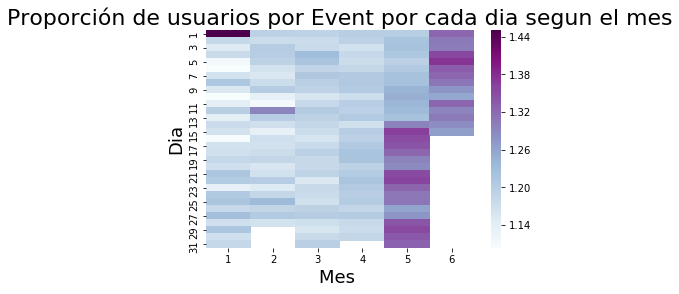

In [32]:
new = new1.pivot_table(index = 'dia', columns = 'mes', values = 'pers_en_event')
g = sns.heatmap(new,  cmap="BuPu", )
g.set_title("Proporción de usuarios por Event por cada dia segun el mes", fontsize=22)
g.set_xlabel("Mes ",fontsize=18)
g.set_ylabel("Dia", fontsize=18)
new.head()

Text(0,0.5,'Cantidad de visitas')

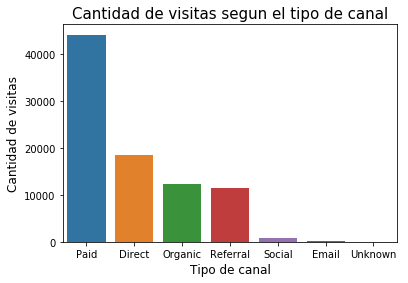

In [33]:
visitas = datos_completo.groupby('event').get_group('visited site')
canales_de_visitas = visitas['channel'].value_counts()
g = sns.barplot(x=canales_de_visitas.index, y=canales_de_visitas.values, orient='v')
g.set_title("Cantidad de visitas segun el tipo de canal", fontsize=15)
g.set_xlabel("Tipo de canal", fontsize=12)
g.set_ylabel("Cantidad de visitas", fontsize=12)